# Rain in Australia

Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

Read the information. The data was obtained from Kagle.

https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download

"This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. "

In [2]:
df=pd.read_csv("/work/weatherAUS.csv")

## Explore

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df=df[df["RainTomorrow"].notnull()]
columns_drop=["Date","Sunshine", "Evaporation", "Cloud9am", "Cloud3pm"]
df=df.drop(columns=columns_drop)

In [5]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [6]:
df.select_dtypes("object").nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [7]:
df["RainToday"] = df["RainToday"].apply(lambda x: 1 if x == "Yes"else "0")
df["RainTomorrow"] = df["RainTomorrow"].apply(lambda x: 1 if x == "Yes"else "0")

In [8]:
df["RainToday"]=df["RainToday"].astype(int)
df["RainTomorrow"]=df["RainTomorrow"].astype(int)

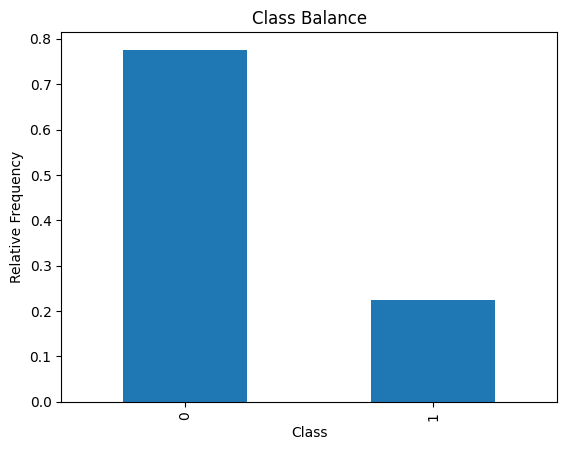

In [9]:
df["RainTomorrow"].value_counts(normalize = True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

There is imbalanced data, but just when the imbalanced datasets  are extreme (i.e.90% for one class and 10% for the other) it will be necessary to require adjustment.

## Split

We are going to split the data frame in X and y and then we are going to use train test plit to obtain X train, X vt, y train and y vt. Finally, we are going to use train test plit again to obtain X val, X test, y val and y test.

In [10]:
target = "RainTomorrow"
X = df.drop(columns=target)
y = df["RainTomorrow"]

In [11]:
X.shape

(142193, 17)

In [12]:
y.shape

(142193,)

In [13]:
X_train, X_vt, y_train, y_vt = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

In [14]:
X_val, X_test, y_val, y_test = train_test_split(
    X_vt, y_vt, test_size = 1/3, random_state = 42
)

In [15]:
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(142193, 17)
(99535, 17)
(28438, 17)
(14220, 17)


## Model

Baseline

We calculate the baseline accuracy score for our model

In [16]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.78


## Iterate

We build the model and fit the model.

In [17]:
# Build Model
model = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), SimpleImputer(), DecisionTreeClassifier(random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## Evaluate

Now we evaluate the model. First, we calculate the training accuracy, then the validation accuracy.

In [18]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val, y_val)
print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 1.0
Validation Accuracy: 0.78


The Training Accuracy is 1, but the Validation Accuracy is 0.78. This means our model is not generalizing well.

We are going to use the get_depth method on the DecisionTreeClassifier in our model to see how deep our tree grew during training.

In [19]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 41


The Tree Depth is 41. This is much flexibility to our model. So, now we are going to create a range of possible values for max_depth hyperparameter of our model's DecisionTreeClassifier

In [20]:
depth_hyperparams = range(1, 50, 2)

We are going to create empty lists for training and validation accuracy scores. We are going to train a model for every max_depth in depth_hyperparams. Every time a new model is trained, the code also calculates the training and validation accuracy scores and append them to the training_acc and validation_acc lists, respectively.

In [21]:
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        SimpleImputer(), 
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.8158738132315266, 0.8292359471542673, 0.8390515898930024]
Validation Accuracy Scores: [0.8144032632393277, 0.8288909205991982, 0.8376468106055278]


We are going to plot the Accuracy Scores: training_acc and the validation_acc vs Max Depth 

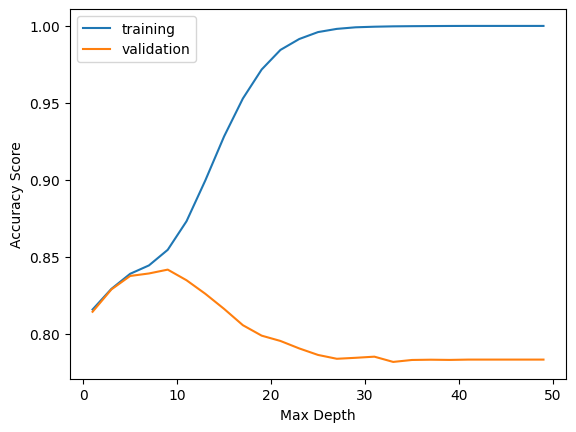

In [22]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label="training")
plt.plot(depth_hyperparams, validation_acc, label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

In the graphic we can see that in the Max Depth equal to 5 the Accuracy Scores: training_acc and the validation_acc have the highest values for both. So we are going to create a model with this Max Depth, and we are going to fit it. 

In [23]:
# Build Model
model = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), SimpleImputer(), DecisionTreeClassifier(max_depth=5,random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

Now we are going to calculate the  Accuracy Scores: acc_train and acc_val.

In [24]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val, y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.84
Validation Accuracy: 0.84


We can see that the Accuracy Scores are 0.84 for both of them. We solve the overfitting problem.

Fianally, we test de model with the test data.

In [25]:
test_acc = model.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.83


The Test Accuracy Scores is 0.83. Everything is fine.

## Communicate

Now we are using plot_tree to create a graphic to visualize the decision logic of our model.

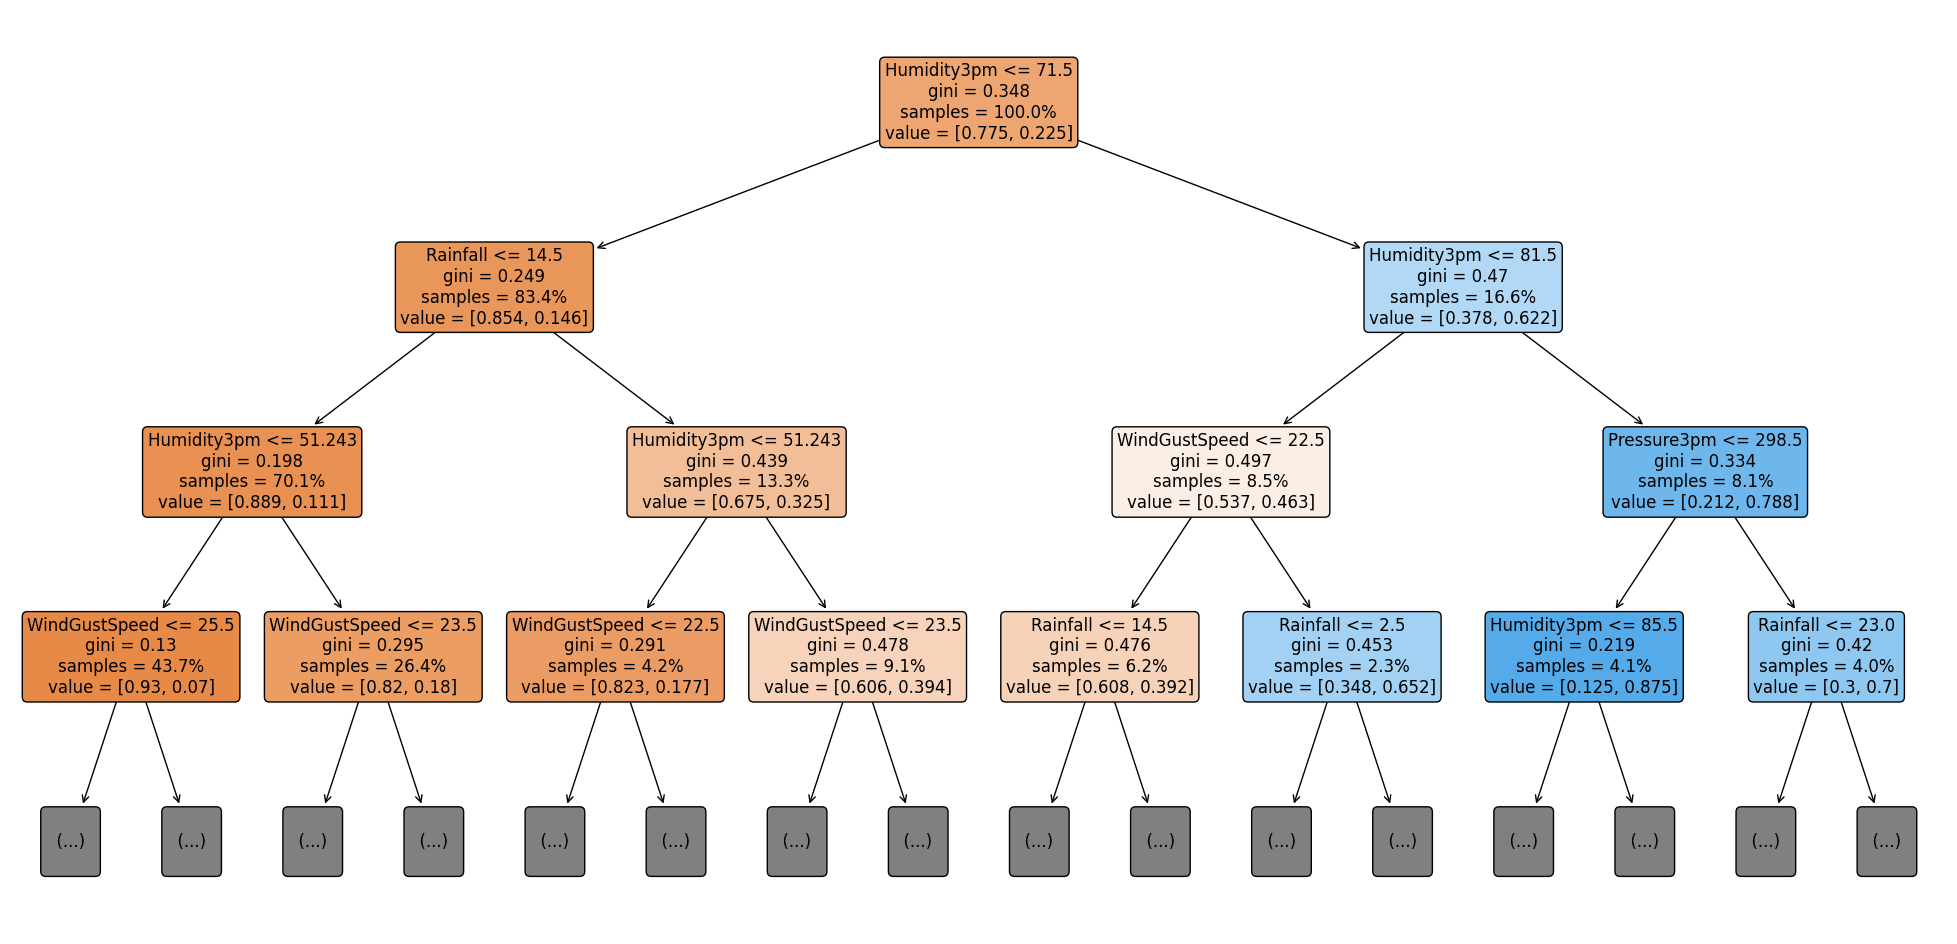

In [26]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

We obtanaine the features and the importances of the model.

In [27]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['Location', 'MinTemp', 'MaxTemp'], dtype='object')
Importances: [0.0018523  0.00612647 0.        ]


In [28]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp

WindSpeed9am     0.000000
Temp9am          0.000000
MaxTemp          0.000000
Pressure9am      0.000000
WindGustDir      0.000000
Humidity9am      0.000000
WindDir9am       0.000000
RainToday        0.001630
Location         0.001852
WindSpeed3pm     0.002013
Temp3pm          0.003472
MinTemp          0.006126
WindDir3pm       0.008241
Pressure3pm      0.054727
WindGustSpeed    0.086435
Rainfall         0.118945
Humidity3pm      0.716559
dtype: float64

We plot the Gini Importance vs Feature of the model.

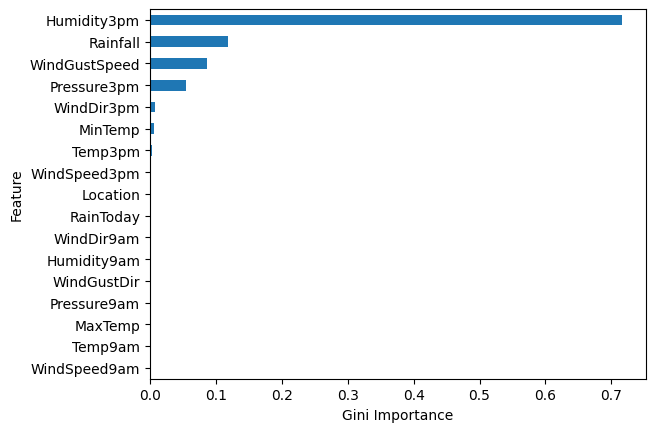

In [29]:
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");

We can see that the most important feature is Humidity3pm.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d8fc1e68-da50-47d9-9a72-c03e62a20f54' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>